In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [172]:
#import the dataset
coffee_shop_sales_data = pd.read_csv("/Users/habs/Downloads/Project.csv")

In [173]:
coffee_shop_sales_data.head()

,transaction_id,transaction_date,transaction_time,store_id,store_location,product_id,transaction_qty,unit_price,Total_Bill,product_category,product_type,product_detail,Size,Month Name,Day Name,Hour,Month,Day of Week
0,114301,01-06-2023,11:33:29,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Thursday,11,6,3
1,115405,02-06-2023,11:18:24,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,11,6,4
2,115478,02-06-2023,12:02:45,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,12,6,4
3,116288,02-06-2023,19:39:47,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,19,6,4
4,116714,03-06-2023,12:24:57,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Saturday,12,6,5


In [176]:
#checking for missing value
missing_values = coffee_shop_sales_data.isnull().sum()
print("Missing_values:\n", missing_values)

Missing_values:
 transaction_id      0
transaction_date    0
transaction_time    0
store_id            0
store_location      0
product_id          0
transaction_qty     0
unit_price          0
Total_Bill          0
product_category    0
product_type        0
product_detail      0
Size                0
Month Name          0
Day Name            0
Hour                0
Month               0
Day of Week         0
dtype: int64


In [178]:
#checking data types
print(coffee_shop_sales_data.dtypes)

transaction_id        int64
transaction_date     object
transaction_time     object
store_id              int64
store_location       object
product_id            int64
transaction_qty       int64
unit_price          float64
Total_Bill          float64
product_category     object
product_type         object
product_detail       object
Size                 object
Month Name           object
Day Name             object
Hour                  int64
Month                 int64
Day of Week           int64
dtype: object


In [180]:
#convert date column to datetime format
coffee_shop_sales_data['transaction_date'] = pd.to_datetime(coffee_shop_sales_data['transaction_date'], format='%d-%m-%Y')
coffee_shop_sales_data['transaction_time'] = pd.to_datetime(coffee_shop_sales_data['transaction_time'], format='%H:%M:%S')

In [182]:
# convert to Categorical data type
coffee_shop_sales_data['Month Name'] = coffee_shop_sales_data['Month Name'].astype('category')
coffee_shop_sales_data['Day Name'] = coffee_shop_sales_data['Day Name'].astype('category')
coffee_shop_sales_data['Size'] = coffee_shop_sales_data['Size'].astype('category')

In [184]:
# rename Column
coffee_shop_sales_data.rename(columns={'Hour': 'Hour_of_day'}, inplace=True)

In [186]:
print(coffee_shop_sales_data.dtypes)

transaction_id               int64
transaction_date    datetime64[ns]
transaction_time    datetime64[ns]
store_id                     int64
store_location              object
product_id                   int64
transaction_qty              int64
unit_price                 float64
Total_Bill                 float64
product_category            object
product_type                object
product_detail              object
Size                      category
Month Name                category
Day Name                  category
Hour_of_day                  int64
Month                        int64
Day of Week                  int64
dtype: object


In [188]:
# check if values are within the range
coffee_shop_sales_data = coffee_shop_sales_data[coffee_shop_sales_data['Hour_of_day'].between(0, 23)]
coffee_shop_sales_data = coffee_shop_sales_data[coffee_shop_sales_data['Day of Week'].between(0, 6)]
coffee_shop_sales_data = coffee_shop_sales_data[coffee_shop_sales_data['Month'].between(1, 12)]

In [190]:
#ensuring Consistancy
coffee_shop_sales_data['store_location'] = coffee_shop_sales_data['store_location'].str.lower()
coffee_shop_sales_data['product_category'] = coffee_shop_sales_data['product_category'].str.lower()
coffee_shop_sales_data['product_type'] = coffee_shop_sales_data['product_type'].str.lower()
coffee_shop_sales_data['product_detail'] = coffee_shop_sales_data['product_detail'].str.lower()
coffee_shop_sales_data['Size'] = coffee_shop_sales_data['Size'].str.lower()
coffee_shop_sales_data['Month Name'] = coffee_shop_sales_data['Month Name'].str.lower()
coffee_shop_sales_data['Day Name'] = coffee_shop_sales_data['Day Name'].str.lower()

In [192]:
# finding the outliers
# Declaration
Q1 = coffee_shop_sales_data['Total_Bill'].quantile(0.25)
Q3 = coffee_shop_sales_data['Total_Bill'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [194]:
# create new column 'Total_Bill_outlier'
coffee_shop_sales_data['Total_Bill_outlier'] = (coffee_shop_sales_data['Total_Bill'] < lower_bound) | \
                                               (coffee_shop_sales_data['Total_Bill'] > upper_bound)

print(coffee_shop_sales_data[['transaction_id', 'Total_Bill', 'Total_Bill_outlier']])

        transaction_id  Total_Bill  Total_Bill_outlier
0               114301         3.0               False
1               115405         3.0               False
2               115478         3.0               False
3               116288         3.0               False
4               116714         3.0               False
...                ...         ...                 ...
149111          129465        17.0                True
149112          133523       360.0                True
149113          133674       360.0                True
149114          133744       360.0                True
149115          149043       360.0                True

[149116 rows x 3 columns]


In [196]:
coffee_shop_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   transaction_id      149116 non-null  int64         
 1   transaction_date    149116 non-null  datetime64[ns]
 2   transaction_time    149116 non-null  datetime64[ns]
 3   store_id            149116 non-null  int64         
 4   store_location      149116 non-null  object        
 5   product_id          149116 non-null  int64         
 6   transaction_qty     149116 non-null  int64         
 7   unit_price          149116 non-null  float64       
 8   Total_Bill          149116 non-null  float64       
 9   product_category    149116 non-null  object        
 10  product_type        149116 non-null  object        
 11  product_detail      149116 non-null  object        
 12  Size                149116 non-null  object        
 13  Month Name          149116 no

In [198]:
# Delete 'Total_bill_Outlier' Column
coffee_shop_sales_data.drop(columns=['Total_Bill_outlier'], inplace=True)

In [200]:
coffee_shop_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  datetime64[ns]
 3   store_id          149116 non-null  int64         
 4   store_location    149116 non-null  object        
 5   product_id        149116 non-null  int64         
 6   transaction_qty   149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   Total_Bill        149116 non-null  float64       
 9   product_category  149116 non-null  object        
 10  product_type      149116 non-null  object        
 11  product_detail    149116 non-null  object        
 12  Size              149116 non-null  object        
 13  Month Name        149116 non-null  object        
 14  Day 

In [202]:
#highest sales and its location
location_sales = coffee_shop_sales_data.groupby('store_location')['Total_Bill'].sum().sort_values(ascending = False)
highest_sales_location = location_sales.idxmax()
highest_sales_amount = location_sales.max()
#displaying the result
print("Total Sales by Location:")
print(location_sales)
print(f"\nLocation with the Highest Sales: {highest_sales_location}")
print(f"Highest Sales Amount: {highest_sales_amount}")

Total Sales by Location:
store_location
hell's kitchen     236511.17
astoria            232243.91
lower manhattan    230057.25
Name: Total_Bill, dtype: float64

Location with the Highest Sales: hell's kitchen
Highest Sales Amount: 236511.17


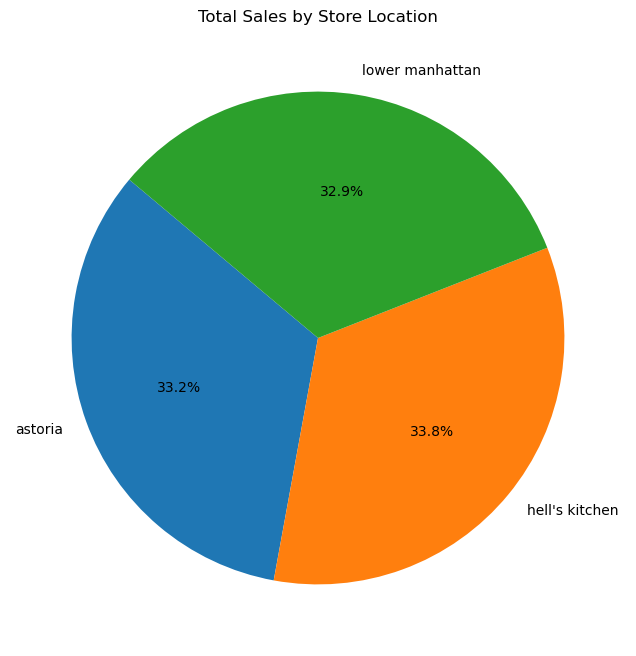

In [204]:
# Highest sales by location data for pie chart
location_sales = coffee_shop_sales_data.groupby('store_location')['Total_Bill'].sum()

# Plotting the pie chart for sales by location
plt.figure(figsize=(8, 8))
plt.pie(location_sales, labels=location_sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Sales by Store Location')
plt.show()

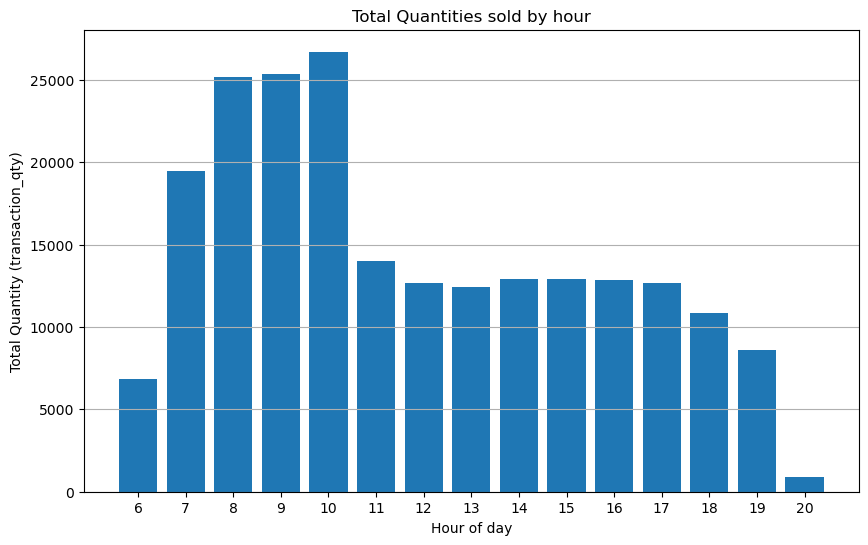

In [206]:
#quantities sold by hour
sales_trend_by_day = coffee_shop_sales_data.groupby('Hour_of_day')['transaction_qty'].sum().sort_values(ascending = False)

# Total quantities sold by hour
sales_trend_by_day = coffee_shop_sales_data.groupby('Hour_of_day')['transaction_qty'].sum().sort_index()

# Plotting the bar chart for quantities sold by month
plt.figure(figsize=(10, 6))
plt.bar(sales_trend_by_day.index, sales_trend_by_day.values)
plt.title('Total Quantities sold by hour')
plt.xlabel('Hour of day')
plt.ylabel('Total Quantity (transaction_qty)')
plt.xticks(sales_trend_by_day.index)  # Ensure all hours are labeled on the x-axis
plt.grid(axis='y')
plt.show()

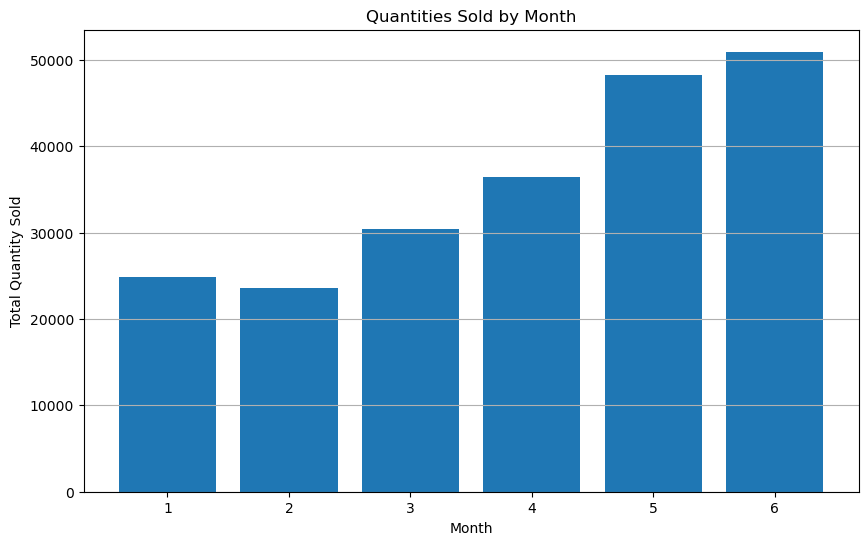

In [208]:
#quantities sold by month
sales_trend_by_month = coffee_shop_sales_data.groupby('Month')['transaction_qty'].sum().sort_values(ascending = False)

# Quantities sold by month
sales_trend_by_month = coffee_shop_sales_data.groupby('Month')['transaction_qty'].sum().sort_index()

# Plotting the bar chart for quantities sold by month
plt.figure(figsize=(10, 6))
plt.bar(sales_trend_by_month.index, sales_trend_by_month.values)
plt.title('Quantities Sold by Month')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.xticks(sales_trend_by_month.index)  # Ensure all months are labeled on the x-axis
plt.grid(axis='y')
plt.show()

In [210]:
#quantities sold by week
sales_by_week = coffee_shop_sales_data.groupby('Day of Week')['transaction_qty'].sum().sort_values(ascending = False)
#displaying the result
print(sales_by_week)

Day of Week
0    31231
4    31207
3    31162
2    30625
1    30449
6    30182
5    29614
Name: transaction_qty, dtype: int64


In [212]:
#quantities sold by product type
product_trend = coffee_shop_sales_data.groupby('product_type')['transaction_qty'].sum().sort_values(ascending = False)
#displaying the result
print(product_trend)

product_type
brewed chai tea          26250
gourmet brewed coffee    25973
barista espresso         24943
brewed black tea         17462
hot chocolate            17457
brewed herbal tea        17328
organic brewed coffee    13012
drip coffee              12891
premium brewed coffee    12431
scone                    10465
brewed green tea          8697
regular syrup             7606
pastry                    6961
biscotti                  5788
sugar free syrup          2905
housewares                 555
chai tea                   443
organic beans              420
premium beans              406
gourmet beans              366
espresso beans             319
herbal tea                 305
black tea                  303
drinking chocolate         266
organic chocolate          221
clothing                   221
house blend beans          183
green tea                  159
green beans                134
Name: transaction_qty, dtype: int64


In [214]:
#total sales by product type
product_sales = coffee_shop_sales_data.groupby('product_type')['Total_Bill'].sum().sort_values(ascending = False)
#displaying the result
print(product_sales)

product_type
barista espresso         91406.20
brewed chai tea          77081.95
hot chocolate            72416.00
gourmet brewed coffee    70034.60
brewed black tea         47932.00
brewed herbal tea        47539.50
premium brewed coffee    38781.15
organic brewed coffee    37746.50
scone                    36866.12
drip coffee              31984.00
pastry                   25655.99
brewed green tea         23852.50
biscotti                 19793.53
premium beans            14583.50
organic beans             8509.50
housewares                7444.00
gourmet beans             6798.00
clothing                  6163.00
regular syrup             6084.80
espresso beans            5560.25
chai tea                  4301.25
house blend beans         3294.00
herbal tea                2729.75
drinking chocolate        2728.04
black tea                 2711.85
sugar free syrup          2324.00
organic chocolate         1679.60
green tea                 1470.75
green beans               1340.00
N

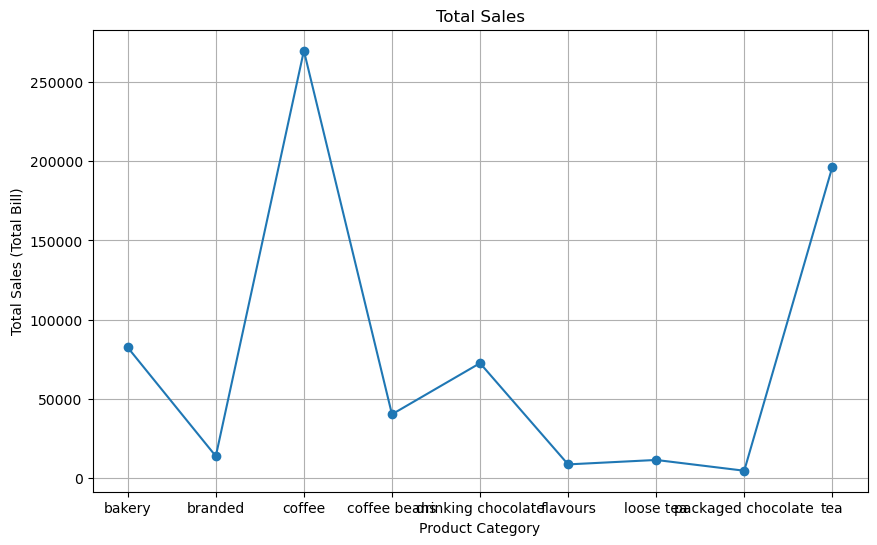

In [216]:
# Total Product sales
product_category_sales = coffee_shop_sales_data.groupby('product_category')['Total_Bill'].sum().sort_index()
# Plotting the line chart for total monthly bill
plt.figure(figsize=(10, 6))
plt.plot(product_category_sales.index, product_category_sales.values, marker='o')
plt.title('Total Sales')
plt.xlabel('Product Category')
plt.ylabel('Total Sales (Total Bill)')
plt.xticks(product_category_sales.index)  # Ensure all product categories are labeled on the x-axis
plt.grid(True)
plt.show()

In [218]:
#total monthly sales
total_sales_month = coffee_shop_sales_data.groupby('Month')['Total_Bill'].sum().sort_values(ascending = False)
#displaying the result
print(total_sales_month)

Month
6    166485.88
5    156727.76
4    118941.08
3     98834.68
1     81677.74
2     76145.19
Name: Total_Bill, dtype: float64


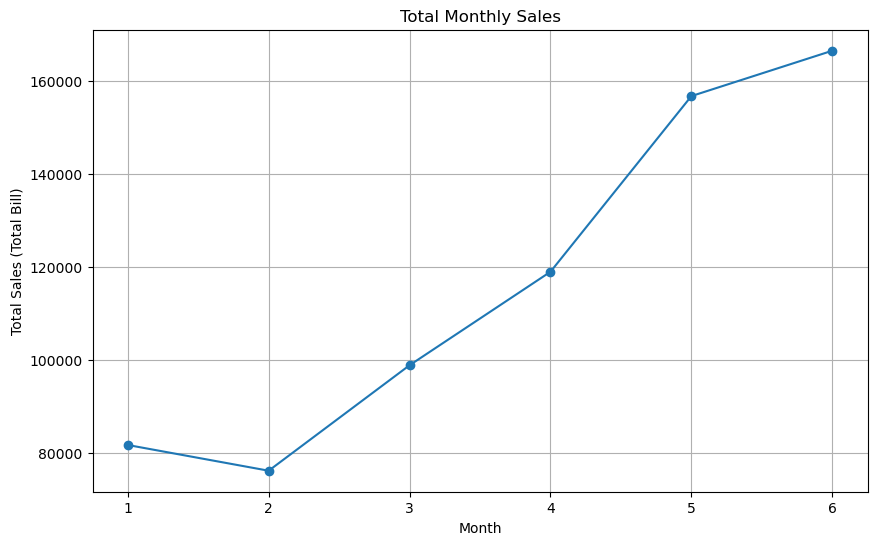

In [220]:
# Total monthly sales
total_sales_month = coffee_shop_sales_data.groupby('Month')['Total_Bill'].sum().sort_index()

# Plotting the line chart for total monthly bill
plt.figure(figsize=(10, 6))
plt.plot(total_sales_month.index, total_sales_month.values, marker='o')
plt.title('Total Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales (Total Bill)')
plt.xticks(total_sales_month.index)  # Ensure all months are labeled on the x-axis
plt.grid(True)
plt.show()

In [222]:
# Group by day_of_the_week and hour, then count the transactions for each group
transaction_counts = coffee_shop_sales_data.groupby(['Day of Week', 'Hour_of_day']).size().reset_index(name='transaction_count')
# Find the peak transaction hour for each day of the week
peak_hours = transaction_counts.loc[transaction_counts.groupby('Day of Week')['transaction_count'].idxmax()]
# Display the results
print(peak_hours)

    Day of Week  Hour_of_day  transaction_count
4             0           10               2612
19            1           10               2846
34            2           10               2596
49            3           10               2570
64            4           10               2761
79            5           10               2551
94            6           10               2609


In [224]:
#product category wise bill
product_category = coffee_shop_sales_data.groupby('product_category')['Total_Bill'].sum().sort_values(ascending = False)
#displaying the result
print(product_category)


product_category
coffee                269952.45
tea                   196405.95
bakery                 82315.64
drinking chocolate     72416.00
coffee beans           40085.25
branded                13607.00
loose tea              11213.60
flavours                8408.80
packaged chocolate      4407.64
Name: Total_Bill, dtype: float64


In [226]:
# Calculate total sales for each size by summing up 'total_bill'
size_sales = coffee_shop_sales_data.groupby('Size')['Total_Bill'].sum().reset_index()
# Rename columns for clarity
size_sales.columns = ['Size', 'total_sales']
# Sort by total_sales to view the impact of each size
size_sales = size_sales.sort_values(by='total_sales', ascending = False)
# Display the result
print(size_sales)

          Size  total_sales
0        large    237958.15
1  not defined    214690.13
2      regular    199761.35
3        small     46402.70


In [228]:
summary_stats = coffee_shop_sales_data.describe()
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
       transaction_id               transaction_date  \
count   149116.000000                         149116   
mean     74737.371872  2023-04-15 11:50:32.173609984   
min          1.000000            2023-01-01 00:00:00   
25%      37335.750000            2023-03-06 00:00:00   
50%      74727.500000            2023-04-24 00:00:00   
75%     112094.250000            2023-05-30 00:00:00   
max     149456.000000            2023-06-30 00:00:00   
std      43153.600016                            NaN   

                    transaction_time       store_id     product_id  \
count                         149116  149116.000000  149116.000000   
mean   1900-01-01 12:14:15.815794688       5.342063      47.918607   
min              1900-01-01 06:00:00       3.000000       1.000000   
25%       1900-01-01 09:05:10.500000       3.000000      33.000000   
50%              1900-01-01 11:15:28       5.000000      47.000000   
75%              1900-01-01 15:25:57       8.000000    

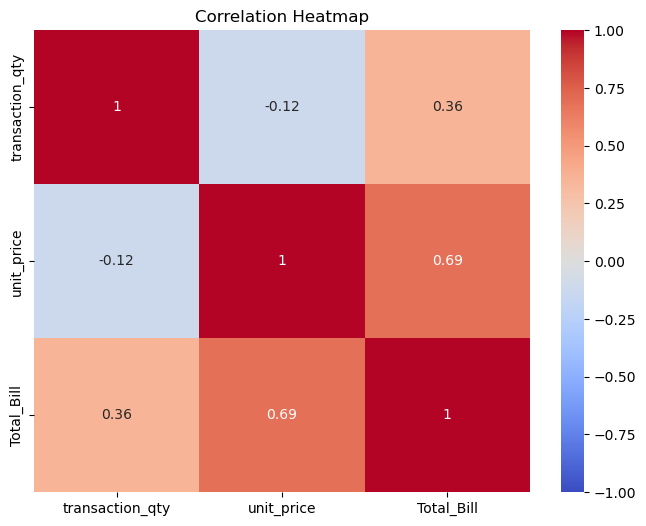

In [230]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(coffee_shop_sales_data[['transaction_qty', 'unit_price', 'Total_Bill']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

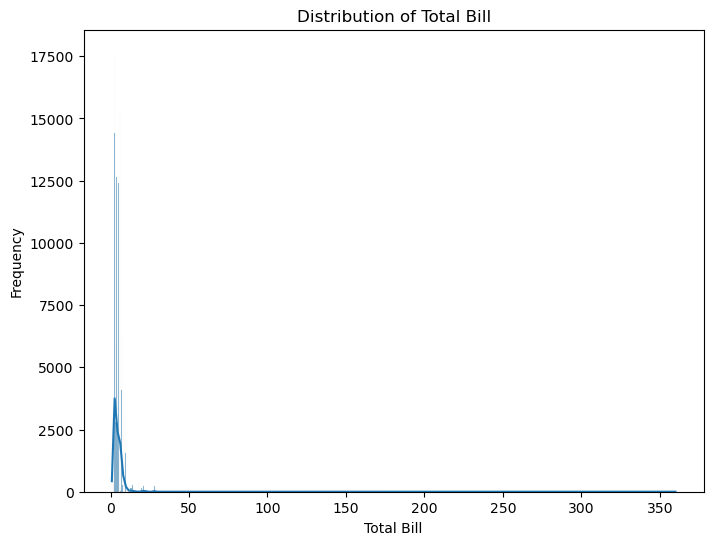

In [232]:
# Distribution plot of Total Bill
plt.figure(figsize=(8, 6))
sns.histplot(coffee_shop_sales_data['Total_Bill'], kde=True)
plt.title('Distribution of Total Bill')
plt.xlabel('Total Bill')
plt.ylabel('Frequency')
plt.show()

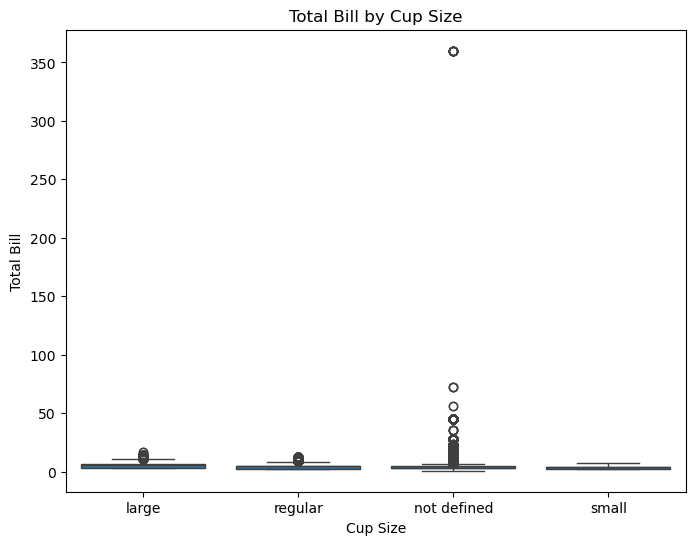

In [233]:
# Boxplot for Total Bill by Size
plt.figure(figsize=(8, 6))
sns.boxplot(data=coffee_shop_sales_data, x='Size', y='Total_Bill')
plt.title('Total Bill by Cup Size')
plt.xlabel('Cup Size')
plt.ylabel('Total Bill')
plt.show()

In [268]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [270]:
coffee_shop_sales_data['store_location'] = coffee_shop_sales_data['store_location'].replace({'Astoria': 1, 'Hell\'s Kitchen': 2, 'Lower Manhattan': 3})

In [272]:
X = coffee_shop_sales_data[['store_location']]
y = coffee_shop_sales_data['Total_Bill']

In [274]:
# Add a constant to the independent variable for statsmodels regression
X_sm = sm.add_constant(X)

In [276]:
# Convert X_sm and y to numeric if necessary
X_sm = X_sm.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

C:\Users\Angel\AppData\Local\Temp\ipykernel_7436\3056075576.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['store_location'] = df['store_location'].replace({'Astoria': 1, 'Hell\'s Kitchen': 2, 'Lower Manhattan': 3})


Statsmodels OLS Regression Summary:
                             OLS Regression Results                            
Dep. Variable:             Total_Bill   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     69.09
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           9.50e-17
Time:                        23:44:49   Log-Likelihood:            -4.2650e+05
No. Observations:              149116   AIC:                         8.530e+05
Df Residuals:                  149114   BIC:                         8.530e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const  

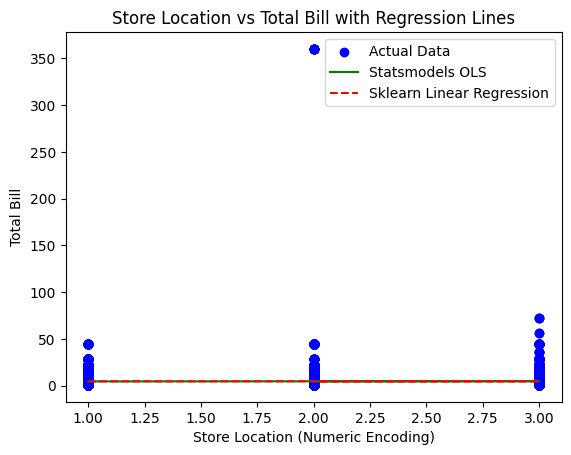

<Figure size 800x600 with 0 Axes>

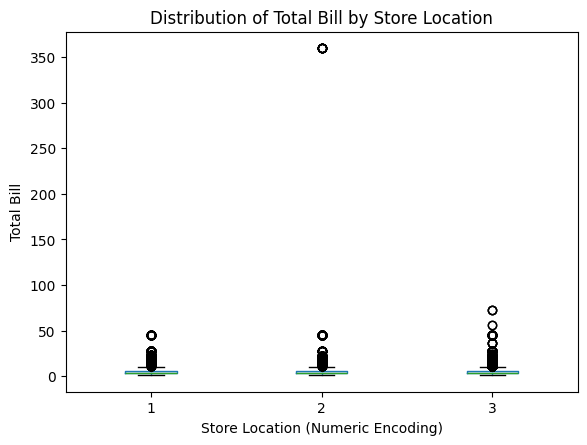

In [1]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_path = r'C:\Users\Angel\Downloads\New folder\Project.csv'
df = pd.read_csv(file_path)

# Replace categorical location values with numeric values
df['store_location'] = df['store_location'].replace({'Astoria': 1, 'Hell\'s Kitchen': 2, 'Lower Manhattan': 3})

# Define the independent and dependent variables
X = df[['store_location']]
y = df['Total_Bill']

# Add a constant to the independent variable for statsmodels regression
X_sm = sm.add_constant(X)

# 1. Using statsmodels for linear regression
model_sm = sm.OLS(y, X_sm).fit()
print("Statsmodels OLS Regression Summary:\n", model_sm.summary())

# 2. Using sklearn's LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model_sklearn = LinearRegression().fit(X_train, y_train)

# Predict on the test set using sklearn model
y_pred_sklearn = model_sklearn.predict(X_test)
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
print(f"Mean Squared Error (sklearn): {mse_sklearn}")

# Generate predictions for the entire dataset for plotting
y_pred_sm = model_sm.predict(X_sm)
y_pred_sklearn_full = model_sklearn.predict(X)

# Scatter plot of the data points
plt.scatter(df['store_location'], df['Total_Bill'], color='blue', label='Actual Data')

# Plotting regression lines
plt.plot(df['store_location'], y_pred_sm, color='green', label='Statsmodels OLS')
plt.plot(df['store_location'], y_pred_sklearn_full, color='red', linestyle='--', label='Sklearn Linear Regression')

# Adding labels and title
plt.xlabel("Store Location (Numeric Encoding)")
plt.ylabel("Total Bill")
plt.title("Store Location vs Total Bill with Regression Lines")
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
df.boxplot(column='Total_Bill', by='store_location', grid=False)
plt.xlabel("Store Location (Numeric Encoding)")
plt.ylabel("Total Bill")
plt.title("Distribution of Total Bill by Store Location")
plt.suptitle("")  # Remove the automatic "Boxplot grouped by store_location" title
plt.show()